epochs = 0
10.071967154740356 1.6183236879368053


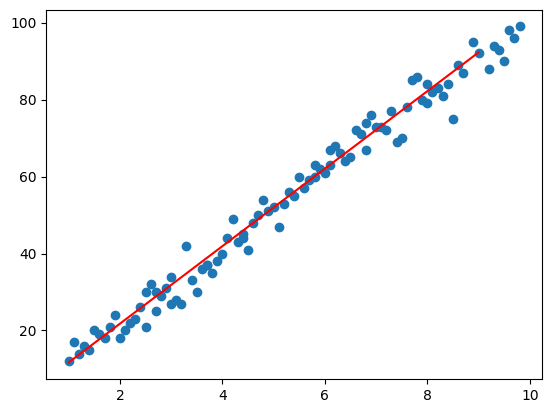

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('./Data/score_updated.csv')
df = df.dropna()
df.head()

def loss_function(m, b, points):
    total_error = 0
    for i in range(len(points)):
        x = points.iloc[i].CGPA
        y = points.iloc[i].ChanceofAdmit
        total_error += (y - (m * x + b)) ** 2
    total_error / float(len(points))

def gradient_descent(m_now, b_now, points, L):
    m_gradient = 0
    b_gradient = 0

    n = len(points)

    for i in range(n):
        x = points.iloc[i].Hours
        y = points.iloc[i].Scores
        m_gradient += -(2 / n) * x * (y - (m_now * x - b_now))
        b_gradient += -(2 / n) * (y - (m_now * x - b_now))

    m = m_now - m_gradient * L
    b = b_now - b_gradient * L
    return m, b

m = 0
b = 0
L = 0.0001
epochs = 500
for i in range(epochs):
    if i % 500 == 0:
        print(f'epochs = {i}')
    m, b = gradient_descent(m, b, df, L)
print(m, b)

plt.scatter(df.Hours, df.Scores)
plt.plot(list(range(1,10)), [m * x + b for x in range(1,10)], color = "red")
plt.show()